# Exponentially Weighted Moving Average (EWMA):
- EWMA is techniqe that is used to find hidden trend in **Time Series Data**. 
- More weightage to upcoming points rather than previous points.
- Overtime Weightage of any point is decreasing.
# EWMA Used in:
- time series data
- signal processing
- optimizers
- financial
- deep learning
# How it is work ?
for weightage moving average of time series data at time t is given by,
- **V)t = B* V)t-1 + (1-B) * θ)t** , where
    - B(Beta) , is constant lie between is 0 to 1
    - V)t , is current weightage moving average of time series data at time **t**
    - V)t-1 , is previous weightage moving average of time series data at time **t-1**
- **if value of Beta(B) is High** means that we are giving more value to previous point
- **if value of Beta(B) is low** means that we are giving more value to current point

# EWMA concept is used during optimizers in deep learning like momentum, SGD momentum, NAG, Adagrad, RMprop and Adam


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dailydelhiclimatetrain-t2/DailyDelhiClimateTest.csv


In [2]:
df = pd.read_csv("/kaggle/input/dailydelhiclimatetrain-t2/DailyDelhiClimateTest.csv")

In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


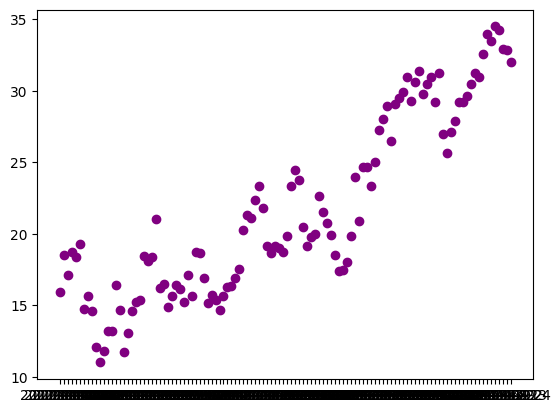

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['date'],df['meantemp'],color='purple')

# Implement Python code for EWMA

In [5]:
def ewma(beta,data):
    V = [data[0]]
    for i in range(1,len(data)):
        V_new = beta * V[i-1] + (1-beta) * data[i]
        V.append(V_new)
    return V
        

In [6]:
beta = 0.9
data = df['meantemp']
EWMA = pd.DataFrame(list(ewma(beta,data)))

In [7]:
EWMA

,0
0,15.913043
1,16.171739
2,16.265676
3,16.509109
4,16.697087
...,...
109,30.640030
110,31.001027
111,31.190924
112,31.359332


# EWMA using Panda

In [8]:

x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [9]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

In [10]:
df['ewm'] = x1
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,ewm
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,15.913043
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,18.264822
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,17.225443
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,18.552677
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,18.405266


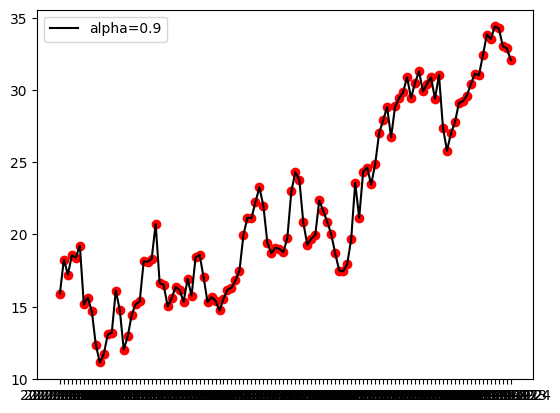

In [11]:
plt.scatter(df['date'],df['ewm'],color='red')
plt.plot(df['date'],x1,color='black',label='alpha=0.9')
plt.legend()
plt.show()